# Neuroprosthetics Exercise 2 - Alexander Koenig

## Subtask 1 - Plot Slope Fields and Isocline

In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams['font.family'] = "Arial"
rcParams['xtick.labelsize'] = 11
rcParams['ytick.labelsize'] = 11
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 12

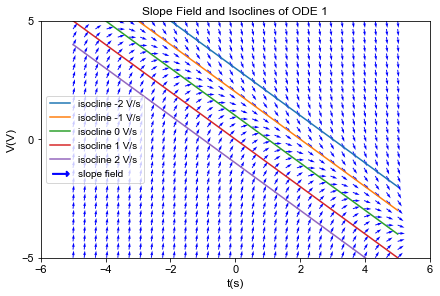

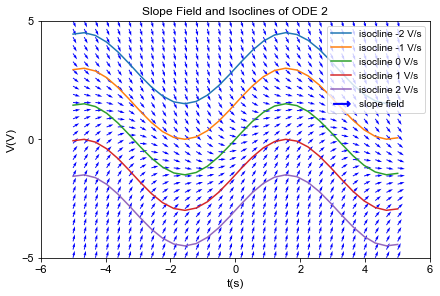

In [2]:
ode_rhs_1 = lambda V, t: 1 - V - t
ode_rhs_2 = lambda V, t: np.sin(t) - V / 1.5

# define intervals
v = np.linspace(-5, 5, 30)
t = np.linspace(-5, 5, 30)
t_grid, v_grid = np.meshgrid(t, v)

# get length of vector
length_1 = np.sqrt(ode_rhs_1(v_grid, t_grid)**2 + 1)
length_2 = np.sqrt(ode_rhs_2(v_grid, t_grid)**2 + 1)

# get horizontal and vertical components, scaled to [0, 1]
dt_1 = 1/length_1
dt_2 = 1/length_2
dv_1 = ode_rhs_1(v_grid, t_grid)/length_1
dv_2 = ode_rhs_2(v_grid, t_grid)/length_2

# calculate isoclines
slopes = [-2, -1, 0, 1, 2]
isoclines_1 = []
isoclines_2 = []
for slope in slopes: 
    isoclines_1.append(1 - slope - t)
    isoclines_2.append(1.5 * (np.sin(t) - slope))

# plot slope for ODE 1
fig = plt.figure(constrained_layout=True)
plt.quiver(t, v, dt_1, dv_1, color='blue')
plt.scatter([], [], c='blue', marker=u'$\u27f6$', s=300, label='slope field')
for i in range(0, len(slopes)):
    plt.plot(t, np.transpose(isoclines_1[i]), label=f'isocline {slopes[i]} V/s')
plt.xlabel("t(s)")
plt.ylabel("V(V)")
plt.ylim(-5, 5)
plt.yticks([-5,0,5])
plt.xticks([-6,-4,-2,0,2,4,6])
plt.title("Slope Field and Isoclines of ODE 1")
plt.legend()
plt.show()
fig.savefig('../figures/ode_1.pdf')
 
# plot slope for ODE 2   
fig = plt.figure(constrained_layout=True)
plt.quiver(t, v, dt_2, dv_2, color='blue')
plt.scatter([], [], c='blue', marker=u'$\u27f6$', s=300, label='slope field')
for i in range(0, len(slopes)):
    plt.plot(t, np.transpose(isoclines_2[i]), label=f'isocline {slopes[i]} V/s')
plt.xlabel("t(s)")
plt.ylabel("V(V)")
plt.ylim(-5, 5)
plt.yticks([-5,0,5])
plt.xticks([-6,-4,-2,0,2,4,6])
plt.title("Slope Field and Isoclines of ODE 2")
plt.legend()
plt.show()
fig.savefig('../figures/ode_2.pdf')

## Subtask 2 -  Differential Equations of a Simple Cell Model

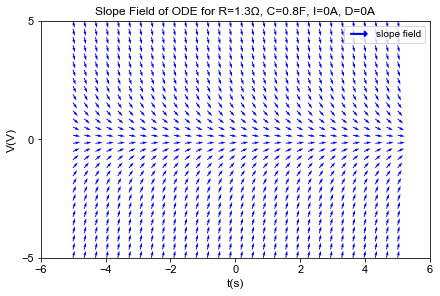

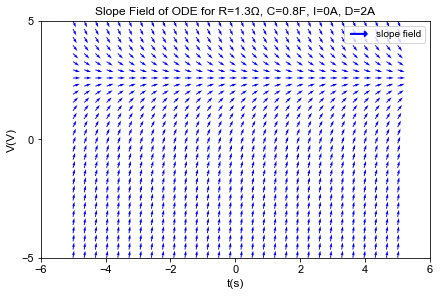

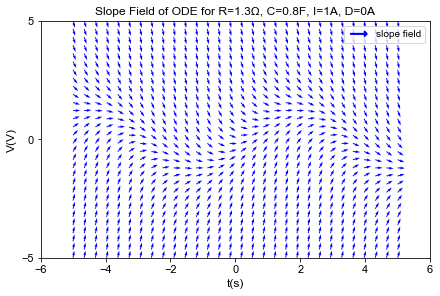

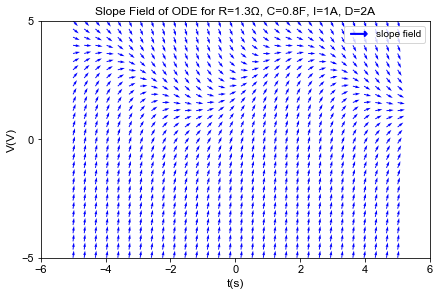

In [3]:
ode_rhs_3 = lambda V, t, C, I, D, R: (I*np.sin(t)+D-V/R)/C

R = 1.3
C = 0.8
I = [0, 1]
D = [0, 2]

for i in I:
    for d in D: 
        
        length = np.sqrt(ode_rhs_3(v_grid, t_grid, C, i, d, R)**2 + 1)
        dt = 1/length
        dv = ode_rhs_3(v_grid, t_grid, C, i, d, R)/length
        
        fig = plt.figure(constrained_layout=True)
        plt.quiver(t, v, dt, dv, color='blue')
        plt.scatter([], [], c='blue', marker=u'$\u27f6$', s=300, label='slope field')
        plt.xlabel("t(s)")
        plt.ylabel("V(V)")
        plt.ylim(-5, 5)
        plt.yticks([-5,0,5])
        plt.xticks([-6,-4,-2,0,2,4,6])
        plt.title(f"Slope Field of ODE for R={R}\u03A9, C={C}F, I={i}A, D={d}A")
        plt.legend()
        plt.show()
        fig.savefig(f'../figures/ode_3_i{i}_d{d}.pdf')